loss:  32.410850524902344
loss:  33.782283782958984
loss:  33.78228759765625
loss:  33.78228759765625
loss:  33.78228759765625
loss:  33.78228759765625
loss:  33.78228759765625
loss:  33.78228759765625
loss:  33.78228759765625
loss:  33.78228759765625
a: 0.560000, alpha: -133.893921, beta: -80.671074, loss: 33.782288


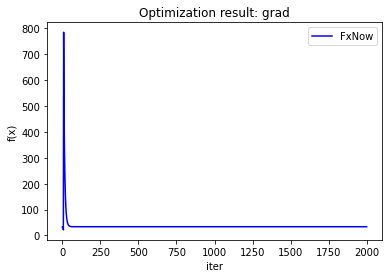

In [3]:
# 梯度下降法（测试）
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'



S = torch.Tensor([1, 1, 2, 2, 3, 3, 1, 6, 5, 4, 3, 4, 4, 4])
N = torch.Tensor([1, 2, 1, 2, 1, 2, 3, 4, 5, 1, 3, 2, 3, 4])
Q = 0.6 * S + 0.4 * (N ** 2)
loss = torch.nn.MSELoss()
a = Variable(torch.randn(1), requires_grad = True)
alpha = Variable(torch.randn(1), requires_grad = True)
beta = Variable(torch.randn(1), requires_grad = True)
all_loss = []
l = 0
for i in range(2000):
    Q_ = a * (S ** alpha) + (1 - a) * (N ** beta) 
    l = loss(Q, Q_)
    if (i % 200 == 0):
        print("loss: ", l.item())
    all_loss.append(l.item())
    l.backward()
    a = Variable(a - 0.1 * a.grad.data, requires_grad = True)
    alpha = Variable(alpha - 0.1 * alpha.grad.data, requires_grad = True)
    beta = Variable(beta - 0.1 * beta.grad.data, requires_grad = True)
print('a: {:.6f}, alpha: {:.6f}, beta: {:.6f}, loss: {:.6f}'.format(a.item(), alpha.item(), beta.item(), l.item()))
# ====== 优化结果图形化输出 ======
plt.figure(figsize=(6, 4), facecolor='#FFFFFF')     # 创建一个图形窗口
plt.title('Optimization result: {}'.format("grad"))  # 设置图形标题
#     plt.xlim((0, kIter))                                # 设置 x轴范围
plt.xlabel('iter')                                  # 设置 x轴标签
plt.ylabel('f(x)')                                  # 设置 y轴标签
plt.plot(all_loss,'b-', label='FxNow')     # 绘制 FxNow 曲线
plt.legend()  # 显示图例
plt.show()

In [68]:
# 单目标单参数模拟退火（测试）
import torch
import random
import math
from torch.autograd import Variable

x = torch.Tensor([2])
y = torch.Tensor([10])
loss = torch.nn.MSELoss()
w_old = 1
T = 3000
kb = 8.6173324e-5
y_ = w_old * x
l_old = loss(y,y_)

for i in range(10000):
    
    if (random.random() < 0.5):
        w_new = w_old + 0.1
    else:
        w_new = w_old - 0.1
#     w_new = w_old + 0.6 * random.normalvariate(0, 1);
    l_new = loss(y, w_new * x)
    
    if (l_new - l_old < 0):
        w_old = w_new
        l_old = l_new
    if (random.random() < math.exp((l_old - l_new) / kb / T)):
        w_old = w_new
        l_old = l_new
    T *= 0.995
print(w_new)
    

4.653897934028461


In [10]:
import math                         # 导入模块
import random                       # 导入模块
# import pandas as pd                 # 导入模块 YouCans, XUPT
import numpy as np                  # 导入模块 numpy, 并简写成 np
import matplotlib.pyplot as plt     # 导入模块 matplotlib.pyplot, 并简写成 plt
import torch
from datetime import datetime
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'


def grade():

    # 主观得分
    truth = []
    # CS得分
    css = []
    # IS得分
    iss = []

    with open("E:\hgc\s.txt", "r") as fl:
        for line in fl.readlines():
            # 去除头尾指定元素，默认为空格，读取的是科学计数法
            line = line.strip('\n') 
            truth.append(float(line))
    with open("E:\hgc\CS.txt", "r") as fh:
        for line in fh.readlines():
            line = line.strip('\n') 
            css.append(float(line))
    with open("E:\hgc\IS.txt", "r") as fs:
        for line in fs.readlines():
            line = line.strip('\n') 
            iss.append(float(line))

    tt = torch.tensor(truth)
    cst = torch.tensor(css)
    ist = torch.tensor(iss)
    
    return tt, cst, ist

# 子程序：定义优化问题的目标函数
def cal_Energy(X, nVar, true, css, iss):

#     Y_ = (S ** X[0]) * (N ** X[1]) * (G ** X[2]);
#     fx = X[0] * (0.5 - 1 / (1 - torch.exp(X[1] * (score_predict - X[2]))))+X[3] * score_predict + X[4]
#     f = X[0] * score_predict
    fx = (1 - X[0]) * ((100 * css) ** X[1]) + X[0] * ((100 * iss) ** X[2])
    loss = torch.nn.MSELoss()
    return loss(true, fx).item()
    


# 子程序：模拟退火算法的参数设置
def ParameterSetting():
    cName = "funcOpt"           # 定义问题名称
    nVar = 3                    # 给定自变量数量，y=f(x1,..xn)
    xMin = [0, -10, -10]         # 给定搜索空间的下限，x1_min,..xn_min
    xMax = [1, 10, 10]           # 给定搜索空间的上限，x1_max,..xn_max

    tInitial = 100.0            # 设定初始退火温度(initial temperature)
    tFinal  = 1                 # 设定终止退火温度(stop temperature)
    alfa    = 0.98              # 设定降温参数，T(k)=alfa*T(k-1)
    meanMarkov = 500            # Markov链长度，也即内循环运行次数
    scale   = 0.5               # 定义搜索步长，可以设为固定值或逐渐缩小
    return cName, nVar, xMin, xMax, tInitial, tFinal, alfa, meanMarkov, scale


# 模拟退火算法
def OptimizationSSA(nVar,xMin,xMax,tInitial,tFinal,alfa,meanMarkov,scale):
    # ====== 初始化随机数发生器 ======
    randseed = random.randint(1, 100)
    random.seed(randseed)  # 随机数发生器设置种子，也可以设为指定整数

    # ====== 随机产生优化问题的初始解 ======
    xInitial = np.zeros((nVar))   # 初始化，创建数组
    for v in range(nVar):
        # random.uniform(min,max) 在 [min,max] 范围内随机生成一个实数
        xInitial[v] = random.uniform(xMin[v], xMax[v])
    
    # 获取分数
    tt, cst, ist = grade()
    
    # 调用子函数 cal_Energy 计算当前解的目标函数值
    fxInitial = cal_Energy(xInitial, nVar, tt, cst, ist)

    # ====== 模拟退火算法初始化 ======
    xNew = np.zeros((nVar))         # 初始化，创建数组
    xNow = np.zeros((nVar))         # 初始化，创建数组
    xBest = np.zeros((nVar))        # 初始化，创建数组
    xNow[:]  = xInitial[:]          # 初始化当前解，将初始解置为当前解
    xBest[:] = xInitial[:]          # 初始化最优解，将当前解置为最优解
    fxNow  = fxInitial              # 将初始解的目标函数（损失值）置为当前值
    fxBest = fxInitial              # 将当前解的目标函数（损失值）置为最优值
    print('x_Initial:{:.6f},{:.6f},{:.6f}\tf(x_Initial):{:.6f}'.format(xInitial[0], xInitial[1], xInitial[2], fxInitial))

    recordIter = []                 # 初始化，外循环次数
    recordFxNow = []                # 初始化，当前解的目标函数值
    recordFxBest = []               # 初始化，最佳解的目标函数值
    recordPBad = []                 # 初始化，劣质解的接受概率
    kIter = 0                       # 外循环迭代次数，温度状态数
    totalMar = 0                    # 总计 Markov 链长度
    totalImprove = 0                # fxBest 改善次数
    nMarkov = meanMarkov            # 固定长度 Markov链

    # ====== 开始模拟退火优化 ======
    # 外循环，直到当前温度达到终止温度时结束
    tNow = tInitial                 # 初始化当前温度(current temperature)
    while tNow >= tFinal:           # 外循环，直到当前温度达到终止温度时结束
        # 在当前温度下，进行充分次数(nMarkov)的状态转移以达到热平衡
        kBetter = 0                 # 获得优质解的次数
        kBadAccept = 0              # 接受劣质解的次数
        kBadRefuse = 0              # 拒绝劣质解的次数

        # ---内循环，循环次数为Markov链长度
        for k in range(nMarkov):    # 内循环，循环次数为Markov链长度
            totalMar += 1           # 总 Markov链长度计数器

            # ---产生新解
            # 产生新解：通过在当前解附近随机扰动而产生新解，新解必须在 [min,max] 范围内
            # 方案 1：只对 n元变量中的一个进行扰动，其它 n-1个变量保持不变
            xNew[:] = xNow[:]
            v = random.randint(0, nVar-1)   # 产生 [0,nVar-1]之间的随机数
            xNew[v] = xNow[v] + scale * (xMax[v]-xMin[v]) * random.normalvariate(0, 1)
            # random.normalvariate(0, 1)：产生服从均值为0、标准差为 1 的正态分布随机实数
            xNew[v] = max(min(xNew[v], xMax[v]), xMin[v])  # 保证新解在 [min,max] 范围内

            # ---计算目标函数和能量差
            # 调用子函数 cal_Energy 计算新解的目标函数值
            fxNew = cal_Energy(xNew, nVar, tt, cst, ist)
            deltaE = fxNew - fxNow

            # ---按 Metropolis 准则接受新解
            # 接受判别：按照 Metropolis 准则决定是否接受新解
            if fxNew < fxNow:  # 更优解：如果新解的目标函数好于当前解，则接受新解
                accept = True
                kBetter += 1
            else:  # 容忍解：如果新解的目标函数比当前解差，则以一定概率接受新解
                pAccept = math.exp(-deltaE / tNow)  # 计算容忍解的状态迁移概率
                if pAccept > random.random():
                    accept = True  # 接受劣质解
                    kBadAccept += 1
                else:
                    accept = False  # 拒绝劣质解
                    kBadRefuse += 1

            # 保存新解
            if accept == True:  # 如果接受新解，则将新解保存为当前解
                xNow[:] = xNew[:]
                fxNow = fxNew
                if fxNew < fxBest:  # 如果新解的目标函数好于最优解，则将新解保存为最优解
                    fxBest = fxNew
                    xBest[:] = xNew[:]
                    totalImprove += 1
                    scale = scale*0.99  # 可变搜索步长，逐步减小搜索范围，提高搜索精度
                    
        # ---内循环结束后的数据整理
        # 完成当前温度的搜索，保存数据和输出
        pBadAccept = kBadAccept / (kBadAccept + kBadRefuse)  # 劣质解的接受概率
        recordIter.append(kIter)  # 当前外循环次数
        recordFxNow.append(fxNow)  # 当前解的目标函数值
        recordFxBest.append(fxBest)  # 最佳解的目标函数值
        recordPBad.append(pBadAccept)  # 最佳解的目标函数值

        if kIter%10 == 0:                           # 模运算，商的余数
            print('i:{},t(i):{:.2f}, badAccept:{:.6f}, f(x)_best:{:.6f}'.\
                format(kIter, tNow, pBadAccept, fxBest))

        # 缓慢降温至新的温度，降温曲线：T(k)=alfa*T(k-1)
        tNow = tNow * alfa
        kIter = kIter + 1
        # ====== 结束模拟退火过程 ======
    print(kIter)
    print('improve:{:d}'.format(totalImprove))
    return kIter,xBest,fxBest,fxNow,recordIter,recordFxNow,recordFxBest,recordPBad

# 结果校验与输出
def ResultOutput(cName,nVar,xBest,fxBest,kIter,recordFxNow,recordFxBest,recordPBad,recordIter):
    # 获取分数
    tt, cst, ist = grade()
    
    # ====== 优化结果校验与输出 ======
    fxCheck = cal_Energy(xBest,nVar,tt, cst, ist)
    if abs(fxBest - fxCheck)>1e-3:   # 检验目标函数
        print("Error 2: Wrong total millage!")
        return
    else:
        print("\nOptimization by simulated annealing algorithm:")
        for i in range(nVar):
            print('\tx[{}] = {:.6f}'.format(i,xBest[i]))
        print('\n\tf(x):{:.6f}'.format(fxBest))

    # ====== 优化结果图形化输出 ======
    plt.figure(figsize=(6, 4), facecolor='#FFFFFF')     # 创建一个图形窗口
    plt.title('Optimization result: {}'.format(cName))  # 设置图形标题
    plt.xlim((0, kIter))                                # 设置 x轴范围
    plt.xlabel('iter')                                  # 设置 x轴标签
    plt.ylabel('f(x)')                                  # 设置 y轴标签
    plt.plot(recordIter, recordFxNow,'b-', label='FxNow')     # 绘制 FxNow 曲线
#     plt.plot(recordIter, recordFxBest, 'r-', label='FxBest')  # 绘制 FxBest 曲线
    # plt.plot(recordIter,recordPBad,'r-',label='pBadAccept')  # 绘制 pBadAccept 曲线
    plt.legend()  # 显示图例
    
    plt.show()

    return

x_Initial:0.956034,8.956550,-8.868973	f(x_Initial):inf
i:0,t(i):100.00, badAccept:0.465164, f(x)_best:227.574448
i:10,t(i):81.71, badAccept:0.491903, f(x)_best:225.957748
i:20,t(i):66.76, badAccept:0.533066, f(x)_best:225.957748
i:30,t(i):54.55, badAccept:0.460922, f(x)_best:221.924652
i:40,t(i):44.57, badAccept:0.445565, f(x)_best:221.924652
i:50,t(i):36.42, badAccept:0.458918, f(x)_best:221.924652
i:60,t(i):29.76, badAccept:0.517034, f(x)_best:221.924652
i:70,t(i):24.31, badAccept:0.547094, f(x)_best:221.924652
i:80,t(i):19.86, badAccept:0.496994, f(x)_best:221.924652
i:90,t(i):16.23, badAccept:0.451417, f(x)_best:221.924652
i:100,t(i):13.26, badAccept:0.506024, f(x)_best:221.924652
i:110,t(i):10.84, badAccept:0.533066, f(x)_best:221.924652
i:120,t(i):8.85, badAccept:0.506000, f(x)_best:221.924652
i:130,t(i):7.23, badAccept:0.511022, f(x)_best:221.924652
i:140,t(i):5.91, badAccept:0.275510, f(x)_best:221.924652
i:150,t(i):4.83, badAccept:0.028926, f(x)_best:221.924652
i:160,t(i):3.95

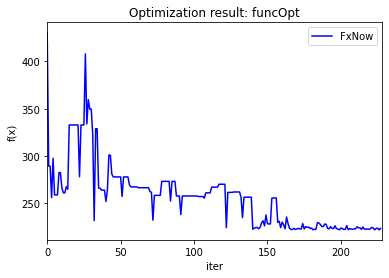

In [11]:
# 参数设置，优化问题参数定义，模拟退火算法参数设置
[cName, nVar, xMin, xMax, tInitial, tFinal, alfa, meanMarkov, scale] = ParameterSetting()
# print([nVar, xMin, xMax, tInitial, tFinal, alfa, meanMarkov, scale])

# 模拟退火算法
[kIter,xBest,fxBest,fxNow,recordIter,recordFxNow,recordFxBest,recordPBad] \
    = OptimizationSSA(nVar,xMin,xMax,tInitial,tFinal,alfa,meanMarkov,scale)
# print(kIter, fxNow, fxBest, pBadAccept)

# 结果校验与输出
ResultOutput(cName, nVar,xBest,fxBest,kIter,recordFxNow,recordFxBest,recordPBad,recordIter)